## lasso regression also do feature selection by making 0 coefficeint to such features which contributes less

In [24]:
from sklearn.datasets import load_diabetes
import numpy as np

In [16]:
data=load_diabetes()
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [2]:
x,y= load_diabetes(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.2)

In [6]:
x_train.shape

(353, 10)

In [8]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [32]:
coeffs =[]
r2_scores = []

alphas=[0,0.1,1,10]
for i in alphas:
    reg=Lasso(alpha=i)
    reg.fit(x_train,y_train)

    coeffs.append(reg.coef_)
    y_pred = reg.predict(x_test)
    r2_scores.append(r2_score(y_test,y_pred))

c:\Users\Ripple\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Ripple\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Ripple\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.066e+05, tolerance: 2.027e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

In [33]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'alpha = 10, r2_score= -0.0')

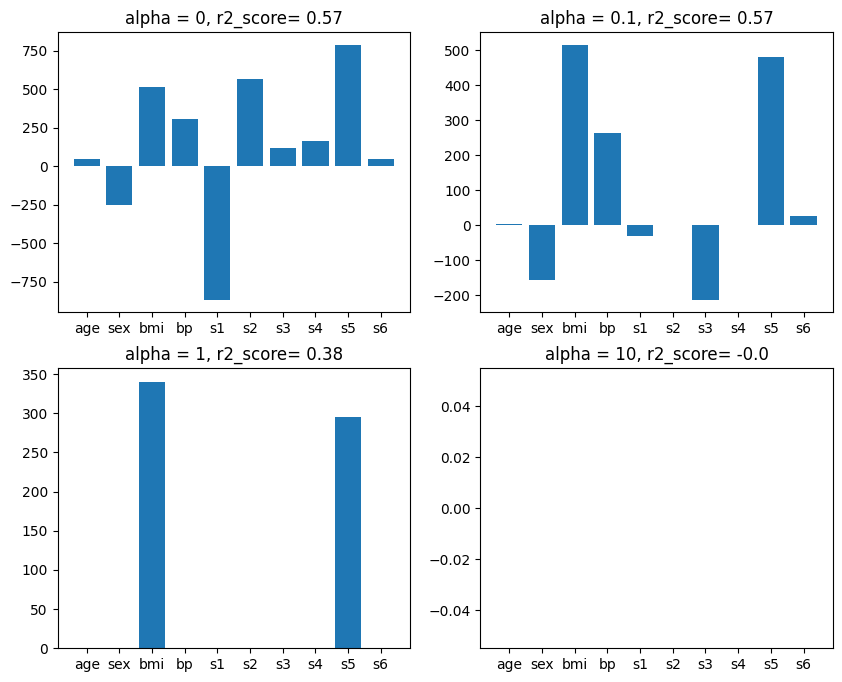

In [34]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.bar(data.feature_names,coeffs[0])
plt.title(f'alpha = {alphas[0]}, r2_score= {np.round(r2_scores[0],2)}')

plt.subplot(222)
plt.bar(data.feature_names,coeffs[1])
plt.title(f'alpha = {alphas[1]}, r2_score= {np.round(r2_scores[1],2)}')

plt.subplot(223)
plt.bar(data.feature_names,coeffs[2])
plt.title(f'alpha = {alphas[2]}, r2_score= {np.round(r2_scores[2],2)}')

plt.subplot(224)
plt.bar(data.feature_names,coeffs[3])
plt.title(f'alpha = {alphas[3]}, r2_score= {np.round(r2_scores[3],2)}')

## bias variance trade-off

* high bias , low variance results in under-fiting
* low bias, high variance results in over-fitting

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Lambda (Regularization Strength)')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Bias vs. Variance Trade-off')

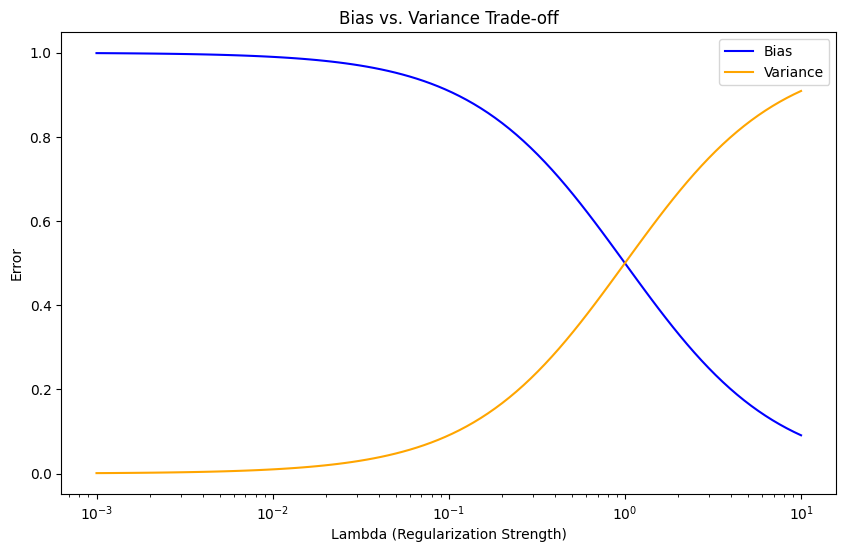

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data points for the curves
lamda = np.logspace(-3, 1, 100)
bias = 1 / (lamda + 1)
variance = lamda / (lamda + 1)

# Plot the bias vs. variance graph
plt.figure(figsize=(10, 6))
plt.plot(lamda, bias, label='Bias',  color='blue')
plt.plot(lamda, variance, label='Variance',  color='orange')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Error')
plt.xscale('log')
plt.title('Bias vs. Variance Trade-off')
plt.legend()


plt.show()

$$ \text{Objective} = \text{RSS} + \lambda \sum_{j=1}^{p} |\beta_j| $$
 $$ \sum_{j=1}^{p} |\beta_j| $$
The reason behind Lasso's ability to create sparsity can be understood from the mathematical formulation of the Lasso penalty term and its effect on the optimization problem during model training.

In Lasso regression, the objective function to minimize is given by:

$$ \text{Objective} = \text{RSS} + \lambda \sum_{j=1}^{p} |\beta_j|$$

where:
- RSS (Residual Sum of Squares) is the sum of squared differences between the actual target values and the predicted values.
- \(\beta_j\) represents the coefficients of the regression model for each feature \(j\).
- \(p\) is the total number of features (predictors) in the model.
- \(\lambda\) is the regularization parameter that controls the strength of the L1 penalty. It balances the trade-off between fitting the data well (minimizing RSS) and keeping the coefficients small (minimizing the penalty term).

The L1 penalty term $$ \sum_{j=1}^{p} |\beta_j|\ $$ is the sum of the absolute values of the coefficients. It plays a crucial role in creating sparsity in the model. Here's why:

1. Geometric Interpretation:
The L1 penalty term creates a diamond-shaped constraint region in the coefficient space. The corners of the diamond occur when one or more coefficients are exactly zero. Each corner of the diamond corresponds to a sparse solution with some features being completely excluded from the model (i.e., having zero coefficients).

2. Optimizing the Objective Function:
During the model training process, the objective is to minimize the combined loss function (RSS) and the L1 penalty. As \(\


## Lasso Regression creates sparsity

for lasso resgression
$$ m = \frac{ \sum (y - \bar{y})(x - \bar{x}) \pm  \lambda} {\sum (x - \bar{x})^2} $$


for ridge regression
$$ m = \frac{\sum (y - \bar{y})(x - \bar{x})}{\sum (x - \bar{x})^2 + \lambda} $$

Both Lasso and Ridge regression introduce regularization to the linear regression model, but they achieve sparsity differently. Lasso can drive some coefficients to exactly zero, producing a sparse model and facilitating feature selection. Ridge regression, on the other hand, can shrink coefficients without setting them to zero, providing more stability and reducing the impact of irrelevant features while still retaining all the input variables in the model. 